# Collectibles and triggers dev

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")
from westworld.environment import GridEnvironment
from westworld.agents import BaseGridAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation import Simulation
from westworld.colors import *

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# First collectible env

In [3]:
!ls sprites

old_sprites
sprite_ball.png
sprite_ball2.png
sprite_blob.png
sprite_blob_akecheta.png
sprite_blob_red.png
sprite_lemon.png


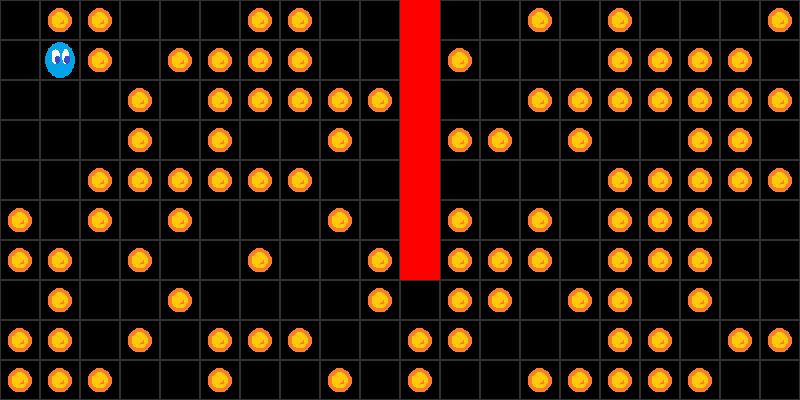

In [4]:
class Agent(BaseGridAgent):
    
    def step(self):
        _,obj = self.find_closest(condition = {"collectible":True})
        self.move_towards(obj = obj[0],n = 20)
        self.wander()
        
        
        
obstacle = BaseObstacle(10,0,1,7,color = RED)

agent_spawner = lambda x,y : Agent(x,y,color = GREEN,img_filepath = "sprites/sprite_blob.png",img_transparency = (200, 191, 231))
coll_spawner = lambda x,y : BaseCollectible(x,y,color = WHITE,circle = True,radius = 0.3,img_filepath = "sprites/sprite_ball2.png",img_transparency = (200, 191, 231))
 


agent1 = agent_spawner(1,1)

# Setup grid
BOX_SIZE = 40
WIDTH = 20
HEIGHT = 10
env = GridEnvironment(WIDTH,HEIGHT,BOX_SIZE,show_grid = True,objects = [obstacle,agent1])
env.spawn(coll_spawner,100)
env.render()
env.get_img()

In [40]:
env.group_triggers.sprites()[0].pos

(7, 8)

In [109]:
env.quit()

# Run simulation

In [76]:
sim = Simulation(env,fps = 30)

In [77]:
sim.run_episode(n_steps = 100,save = False,replay=True)

interactive(children=(Play(value=0, description='Press play', interval=200), Output()), _dom_classes=('widget-…

IntSlider(value=0)

In [155]:
agent1.pos

(3, 2)

In [166]:
agent1.rect

<rect(3, 2, 20, 20)>

In [ ]:
    
#     def render(self,screen = None):
#         ratio = 4
        
#         c,_ = agent1.collides(group,ratio = ratio,method = "circle")
#         if c:
#             color = RED
#         else:
#             color = WHITE
        
#         self.render_circle(radius = ratio,color = color,thickness = 1)
#         self.render_rect(ratio = ratio,color = color,center = True,thickness = 1)
#         super().render(screen)

In [167]:
agent2.rect

<rect(7, 7, 20, 20)>

In [173]:
agent2.mask

<Mask(20x20)>

In [174]:
pygame.sprite.collide_mask(agent1,agent2)

(4, 5)

In [165]:
agent1.collides_group(env.group_blocking)

yo


(True, [Agent(x=7,y=7)])

In [163]:
agent1.height

1

In [156]:
env.group_blocking

<Group(2 sprites)>

In [154]:
agent1.collides()

(True, [Agent(x=7,y=7)])

2

In [26]:
import sys
sys.path.append("../../")
from westworld.environment import GridEnvironment
from westworld.agents import BaseGridAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible,BaseLayer
from westworld.simulation import Simulation
from westworld.colors import *

#==================================================================================================
# BASE CLASSES
#==================================================================================================

class Agent(BaseGridAgent):
    """Smart Agent following the mouse with pathfinding
    """
    def step(self):
        self.follow_mouse(n = 200)
        
class WanderAgent(BaseGridAgent):
    """Agent wandering the environment
    """
    def step(self):
        self.wander()
        
    def when_blocked(self,collisions):
        self.set_direction()
        
        
class RandomAgent(BaseGridAgent):
    """Agent moving with random walk
    """
    def step(self):
        self.random_walk()

In [28]:

# Prepare layer
layer = BaseLayer(img_filepath = "layers/GeneratedMaze_cellsize=20.png",img_transparency = (255,255,255))

# Prepare agents
agents = [
    Agent(1,1,color = RED,img_filepath = "sprites/sprite_blob.png"),
    WanderAgent(1,19,color = BLUE,curiosity = 20),
    RandomAgent(19,19,color = GREEN),
]



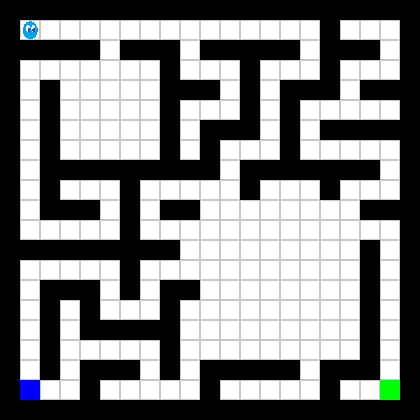

In [30]:
# Prepare environment
env = GridEnvironment(
    cell_size = 20,
    show_grid = True,
    background_color = WHITE,
    grid_color = (200,200,200),
    objects = agents + [layer])

env.render()
env.get_img()





In [31]:
# Prepare simulation and run it
sim = Simulation(env,fps = 15,name = "LayerPathfindingMouse")
sim.run_episode(n_steps = 200,save = False)

../..\westworld\algorithms\pathfinding\astar.py:141: UserWarning: Giving up on pathfinding too many iterations
  warnings.warn("Giving up on pathfinding too many iterations")
